In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from datasets.nsd.nsd import NaturalScenesDataset
from datasets.nsd.nsd_measures import NSDMeasuresDataset

In [2]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

subject = 2
data_root = './data/NSD'
measures = ['warmth', 'saturation', 'brightness', 'entropy', "depth", "gaussian_curvature", "surface_normal"]

nsd = NaturalScenesDataset(
    root=data_root,
    subject=subject,
    partition="train",
)

dataset = NSDMeasuresDataset(
    nsd=nsd,
    measures=measures,
    patches_shape=(64, 64),
    img_shape=(448,448),
)
del nsd

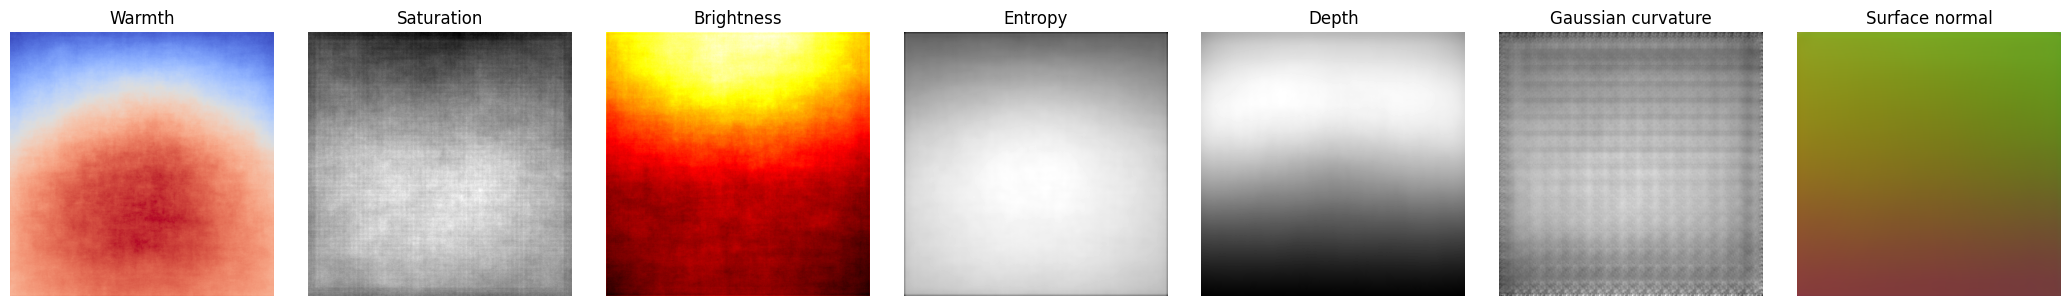

In [38]:
f, axes = plt.subplots(1, len(measures), figsize=(3*len(measures), 3))
axes[0].imshow(np.moveaxis(dataset.averages['warmth'],0,-1), cmap='coolwarm')
axes[0].set_title("Warmth")
axes[0].axis('off')
axes[1].imshow(np.moveaxis(dataset.averages['saturation'],0,-1), cmap='gray')
axes[1].set_title("Saturation")
axes[1].axis('off')
axes[2].imshow(np.moveaxis(dataset.averages['brightness'],0,-1), cmap='hot')
axes[2].set_title("Brightness")
axes[2].axis('off')
axes[3].imshow(np.moveaxis(dataset.averages['entropy'],0,-1), cmap='gray')
axes[3].set_title("Entropy")
axes[3].axis('off')
axes[4].imshow(np.moveaxis(dataset.averages['depth'],0,-1), cmap='gray')
axes[4].set_title("Depth")
axes[4].axis('off')
axes[5].imshow(np.moveaxis(dataset.averages['gaussian_curvature'],0,-1), cmap='gray')
axes[5].set_title("Gaussian curvature")
axes[5].axis('off')
axes[6].imshow(np.moveaxis(dataset.averages['surface_normal'],0,-1))
axes[6].set_title("Surface normal")
axes[6].axis('off')
plt.tight_layout()
plt.show()

tensor(-2.1784) tensor(3.9242)


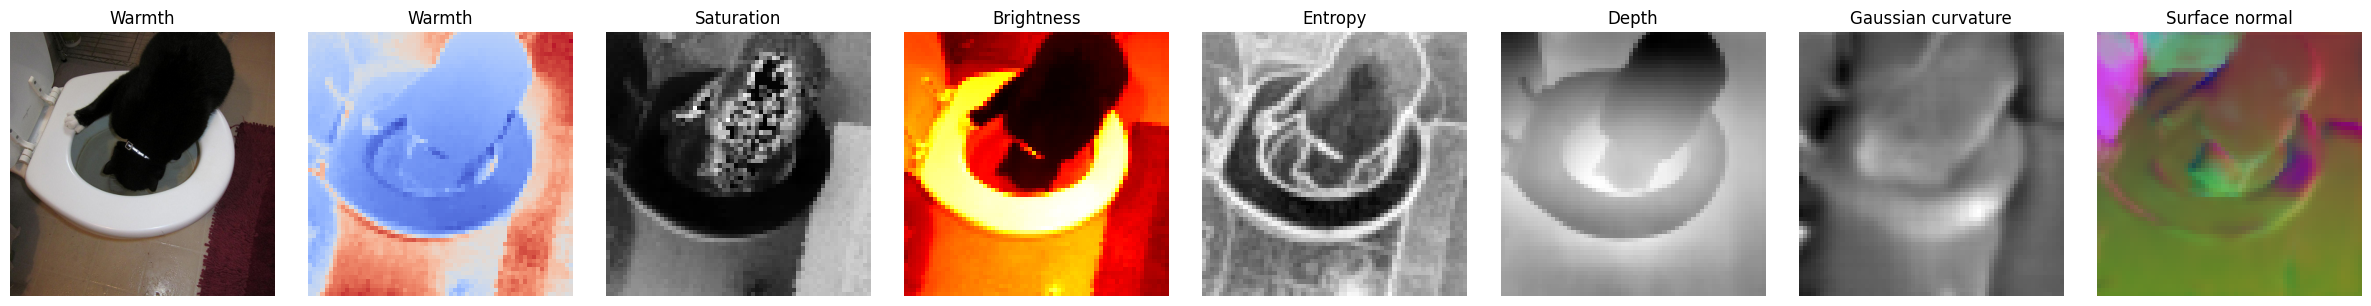

In [32]:
idx = np.random.randint(len(dataset))

img, patches = dataset[idx]

print(patches[6:9].min(), patches[6:9].max())

f, axes = plt.subplots(1, len(measures)+1, figsize=(3*(len(measures)+1), 3))
axes[0].imshow(img.permute(1,2,0))
axes[0].set_title("Warmth")
axes[0].axis('off')
axes[1].imshow(patches[0], cmap='coolwarm')
axes[1].set_title("Warmth")
axes[1].axis('off')
axes[2].imshow(patches[1], cmap='gray')
axes[2].set_title("Saturation")
axes[2].axis('off')
axes[3].imshow(patches[2], cmap='hot')
axes[3].set_title("Brightness")
axes[3].axis('off')
axes[4].imshow(patches[3], cmap='gray')
axes[4].set_title("Entropy")
axes[4].axis('off')
axes[5].imshow(patches[4], cmap='gray')
axes[5].set_title("Depth")
axes[5].axis('off')
axes[6].imshow(patches[5], cmap='gray')
axes[6].set_title("Gaussian curvature")
axes[6].axis('off')
normals = patches[6:9].permute(1,2,0)
normals = (normals - normals.min()) / (normals.max() - normals.min())
axes[7].imshow(normals)
axes[7].set_title("Surface normal")
axes[7].axis('off')
plt.tight_layout()
plt.show()

100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


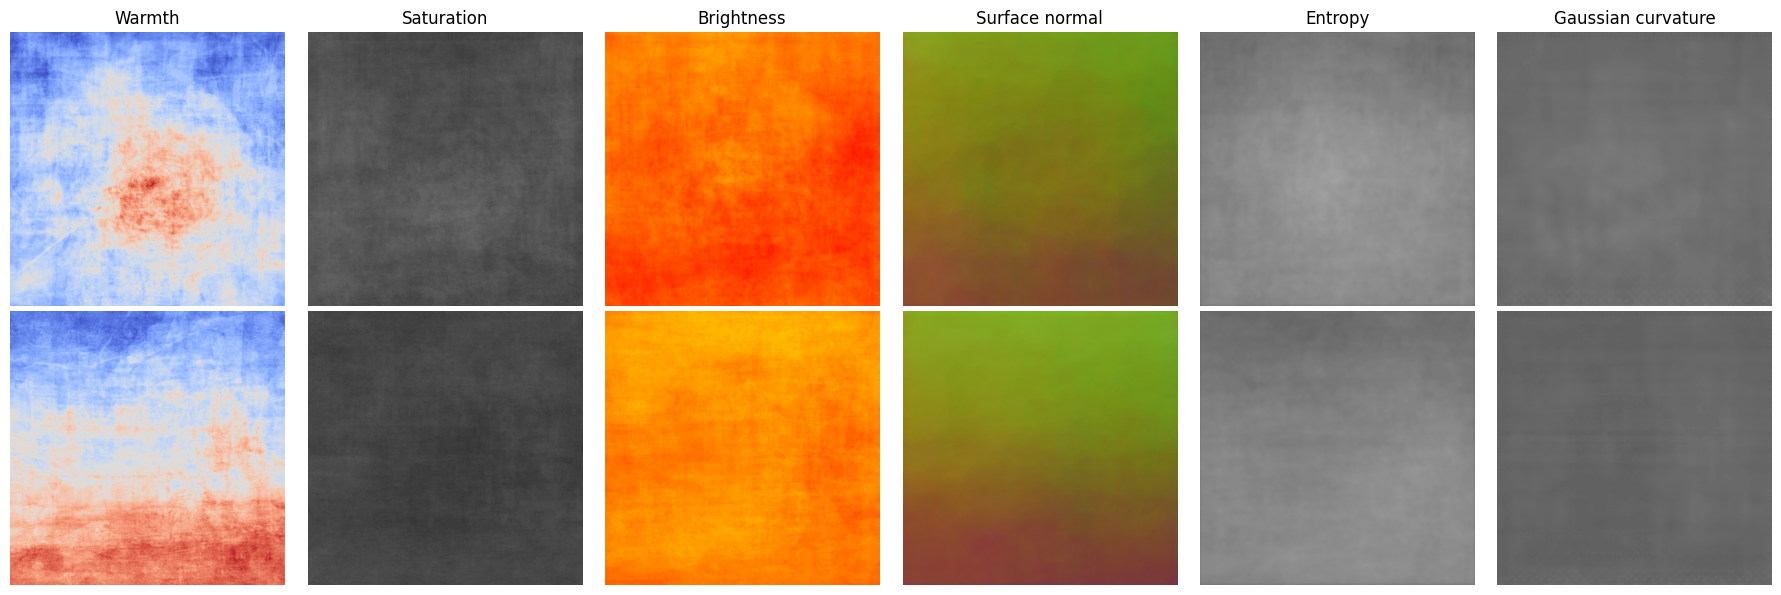

In [7]:
min_idx = np.argsort(dataset.targets.numpy())[:100]
max_idx = np.argsort(dataset.targets.numpy())[-100:]

min_warmths = []
min_saturations = []
min_brightnesses = []
min_surface_normals = []
min_entropies = []
min_gaussian_curvatures = []

for idx in tqdm(min_idx):
    patches = dataset[idx][0][0]
    min_warmths.append(patches[:,:,7])
    min_saturations.append(patches[:,:,3])
    min_brightnesses.append(patches[:,:,0])
    min_surface_normals.append(patches[:,:,4:7])
    min_entropies.append(patches[:,:,1])
    min_gaussian_curvatures.append(patches[:,:,2])

max_warmths = []
max_saturations = []
max_brightnesses = []
max_surface_normals = []
max_entropies = []
max_gaussian_curvatures = []

for idx in tqdm(max_idx):
    patches = dataset[idx][0][0]
    max_warmths.append(patches[:,:,7])
    max_saturations.append(patches[:,:,3])
    max_brightnesses.append(patches[:,:,0])
    max_surface_normals.append(patches[:,:,4:7])
    max_entropies.append(patches[:,:,1])
    max_gaussian_curvatures.append(patches[:,:,2])

f, axes = plt.subplots(2, 6, figsize=(18, 6))
axes[0,0].imshow(np.mean(max_warmths, axis=0), cmap='coolwarm')#, vmin=0, vmax=255)
axes[0,0].set_title("Warmth")
axes[0,0].axis('off')
axes[0,1].imshow(np.mean(max_saturations, axis=0), cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Saturation")
axes[0,1].axis('off')
axes[0,2].imshow(np.mean(max_brightnesses, axis=0), cmap='hot', vmin=0, vmax=255)
axes[0,2].set_title("Brightness")
axes[0,2].axis('off')
axes[0,3].imshow(np.mean(max_surface_normals, axis=0))
axes[0,3].set_title("Surface normal")
axes[0,3].axis('off')
axes[0,4].imshow(np.mean(max_entropies, axis=0), cmap='gray', vmin=0, vmax=1)
axes[0,4].set_title("Entropy")
axes[0,4].axis('off')
axes[0,5].imshow(np.mean(max_gaussian_curvatures, axis=0), cmap='gray', vmin=0, vmax=1)
axes[0,5].set_title("Gaussian curvature")
axes[0,5].axis('off')
axes[1,0].imshow(np.mean(min_warmths, axis=0), cmap='coolwarm')#, vmin=0, vmax=255)
axes[1,0].axis('off')
axes[1,1].imshow(np.mean(min_saturations, axis=0), cmap='gray', vmin=0, vmax=255)
axes[1,1].axis('off')
axes[1,2].imshow(np.mean(min_brightnesses, axis=0), cmap='hot', vmin=0, vmax=255)
axes[1,2].axis('off')
axes[1,3].imshow(np.mean(min_surface_normals, axis=0))
axes[1,3].axis('off')
axes[1,4].imshow(np.mean(min_entropies, axis=0), cmap='gray', vmin=0, vmax=1)
axes[1,4].axis('off')
axes[1,5].imshow(np.mean(min_gaussian_curvatures, axis=0), cmap='gray', vmin=0, vmax=1)
axes[1,5].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from PIL import Image
import os
from methods.img_utils import image_grid_as_image
from tqdm import tqdm

idxs = np.random.choice(len(dataset), 500, replace=False)

warmths = []
saturations = []
brightnesses = []
surface_normals = []
entropies = []
gaussian_curvatures = []

for idx in tqdm(idxs):
    patches = dataset[idx][0][0]
    warmths.append(patches[:,:,7].mean())
    saturations.append(patches[:,:,3].mean())
    brightnesses.append(patches[:,:,0].mean())
    surface_normals.append(patches[:,:,4:7].mean())
    entropies.append(patches[:,:,1].mean())
    gaussian_curvatures.append(patches[:,:,2].mean())

for l in [warmths, saturations, brightnesses, surface_normals, entropies, gaussian_curvatures]:
    
    min_idx = np.argsort(l)[:25]
    min_idx = idxs[min_idx]
    min_imgs = [Image.open(os.path.join(data_root, dataset.nsd.df.iloc[i]["filename"])) for i in min_idx]
    max_idx = np.argsort(l)[-25:]
    max_idx = idxs[max_idx]
    max_imgs = [Image.open(os.path.join(data_root, dataset.nsd.df.iloc[i]["filename"])) for i in max_idx]
    
    f, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(image_grid_as_image(min_imgs, 5, 5))
    axes[0].axis("off")
    axes[1].imshow(image_grid_as_image(max_imgs, 5, 5))
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()